In [24]:
#!pip install mlxtend 
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report
from matplotlib import cm
from sklearn.metrics import silhouette_samples


## load the data 

In [37]:
iris = datasets.load_iris();iris.data[:5]
X = iris.data[:, [0, 2]]
y = iris.target

## Use elbow to select the best model

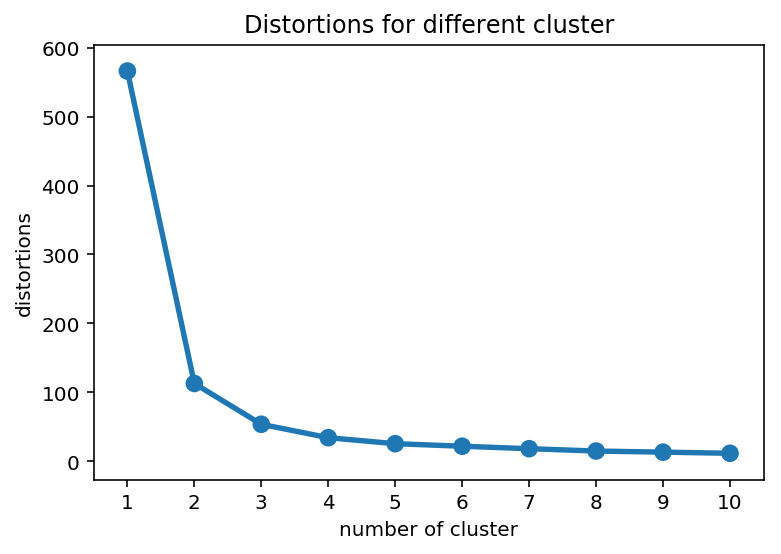

In [38]:
distortions = []
for i in range(1,11):
    knn = KMeans(n_clusters = i,
                init = "k-means++",
                n_init = 20,
                max_iter = 300,
                random_state = 0)
    knn.fit_predict(X)
    #y_pred = knn.predict(X_test_std)
    distortions.append(knn.inertia_)


x = np.arange(1,11,1)
sns.pointplot(x, distortions, marker = 'o')
plt.xlabel('number of cluster')
plt.ylabel('distortions')
plt.title('Distortions for different cluster')
plt.show()

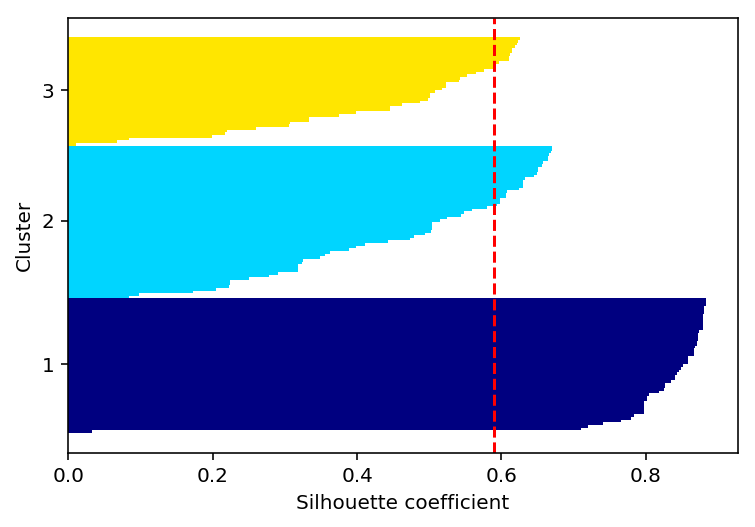

In [36]:
knn = KMeans(n_clusters=3,
             init='k-means++',
             n_init=10,
             max_iter=300,
             tol=1e-04,
             random_state=0)
clusters = knn.fit_predict(X)
cluster_labels = np.unique(clusters)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, 
                                    clusters,
                                    metric = 'euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
            color = color)
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color = 'red',
           linestyle = '--')
plt.yticks(yticks, cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

As we can see in the following plot, the elbow is located at k=3, which is evidence that 
k=3 is indeed a good choice for this dataset: